In [3]:
from skimage.io import imshow, imshow_collection
import numpy as np
import matplotlib.pylab as plt
from skimage import data

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imshow', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [52]:
def os_filter(image, k, window_size):
    win_size = window_size[0] * window_size[1]
    filter_iter_shape = (image.shape[0] + 2 * window_size[0] - 2,
                         image.shape[1] + 2 * window_size[1] - 2)
    for_filter = np.zeros(filter_iter_shape, dtype=int)
    for_filter[window_size[0] - 1:filter_iter_shape[0] - (window_size[0] - 1), 
               window_size[1] - 1: filter_iter_shape[1] - (window_size[1] - 1)] = image
    result = np.zeros((image.shape[0] + window_size[0] - 1,
                       image.shape[1] + window_size[1] - 1), dtype=int)
    for i in range(filter_iter_shape[0] - window_size[0] + 1):
        for j in range(filter_iter_shape[1] - window_size[1] + 1):
            result[i, j] = np.partition(for_filter[i:i + window_size[0], 
                                                   j:j + window_size[1]].reshape(win_size), 
                                        win_size - k)[win_size - k]
    return result

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


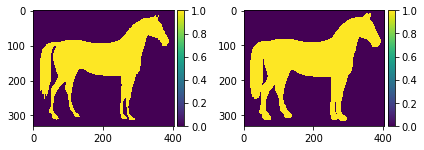

In [57]:
image = data.horse() == 0
imshow_collection([os_filter(image, 9, (3,3)), os_filter(image, 1, (5,5))])

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


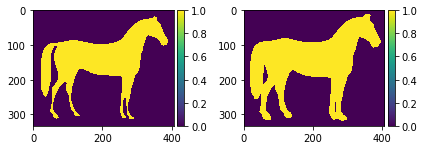

In [59]:
imshow_collection([os_filter(image, 40, (7,7)), os_filter(image, 6, (7,7))])

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


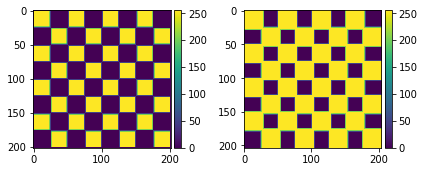

In [60]:
image2 = data.checkerboard()
imshow_collection([os_filter(image2, 9, (3,3)), os_filter(image2, 1, (5,5))])

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


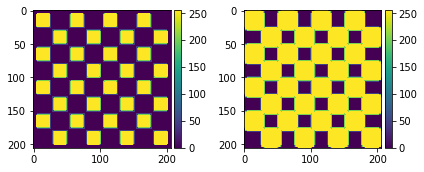

In [61]:
imshow_collection([os_filter(image2, 40, (7,7)), os_filter(image2, 6, (7,7))])